In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from approximation import *
from utilities import *
from mpl_toolkits.mplot3d import Axes3D

In [3]:
## Number of times to evaluate to construct the approximating curves
nb_samples = 100
## Evaluation times associated with each sample
list_t = generate_samples(nb_samples= nb_samples)

# TP2 Bezier Curve Approximation

In this TP we are interested approximating curves. We see different methods to generate Bézier curves and then compare their complexity.

## Bernstein polynomials

Bernstein polynomials are the right polynomial basis to express a Bezier curve.

There are n+1 Bernstein polynomials of degree n, so for k $\in \{0.n\}$.

That is:

$B_{k}^{n}(t) =  \left( ^{n}_{k}\right) t^k (1-t)^{n-k}.$

You can visualize the shape of this polynomial basis as a function of the degree $n$. What do you observe?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact


## Number of times to evaluate to construct the approximating curves
nb_samples = 50
## Evaluation times associated with each sample
list_tt = generate_samples(nb_samples= nb_samples)

## Display
def plot_bernstein(degree):
    plt.figure()
    base = build_polys_bernstein(degree, list_tt)
    for i in range(len(base)):
        curve_i = base[i]
        plt.plot(curve_i[:,0], curve_i[:,1], color=liste_couleurs[i % len(liste_couleurs)], label=f'k = {i}')

    plt.legend()
    plt.xlabel('t')
    plt.ylabel('Value of Bernstein polynomial')
    plt.title(f"Bernstein Polynomials up to Degree {degree}")
    plt.show()

# Create the slider
slider = widgets.IntSlider(min=0, max=15, step=1, value=3, description='Degree Max:')

# Use the interactive widget to update the display
interact(plot_bernstein, degree=slider)

interactive(children=(IntSlider(value=3, description='Degree Max:', max=15), Output()), _dom_classes=('widget-…

<function __main__.plot_bernstein(degree)>

**Bezier curve using Bernstein polynomials**

A Bezier curve with $n+1$ control points can be calculated using the following formula:

$
\mathbf{B}(t) = \sum_{i=0}^{n} \mathbf{P}_i B_{i,n}(t)
$

Draw a Bezier curve using Bernstein polynomials.

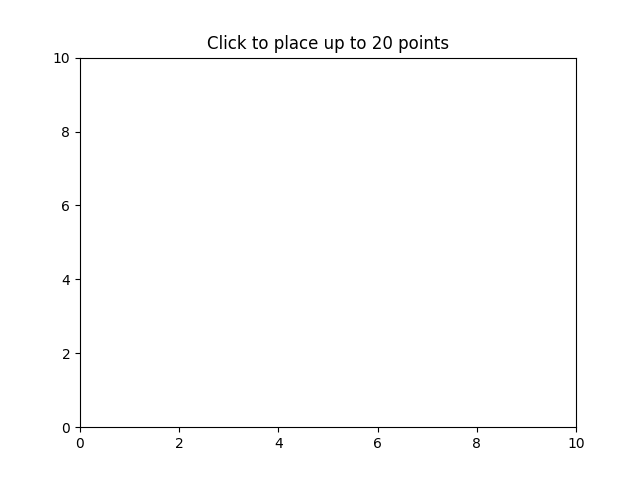

Button(description='Reset', style=ButtonStyle())

Button(description='Calculate', style=ButtonStyle())

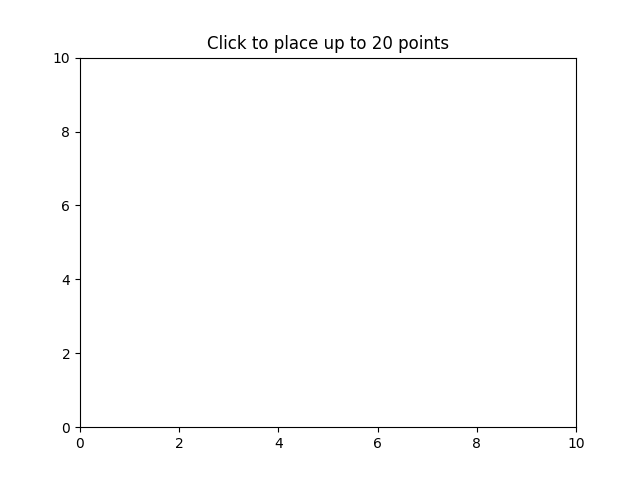

ValueError: not enough values to unpack (expected 2, got 0)

In [28]:
%matplotlib widget

BernsteinApprox((0, 10), (0, 10), 20)



# The algorithm of Casteljau

De Casteljau’s algorithm for evaluating a Bézier curve is defined as follows:

Either
$
\mathbf{P}_0, \mathbf{P}_1, \ldots, \mathbf{P}_n\
$
control points of a Bezier curve of degree n.

The De Casteljau algorithm computes the intermediate points  ( mathbf{P}_i {(k)} ) as follows:

1. Initialization:
$
\mathbf{P}_i^{(0)} = \mathbf{P}_i \quad \text{for} \quad i = 0, 1, \ldots, n
$

2. Recurrence:
$
\mathbf{P}_i^{(k)} = (1 - t) \mathbf{P}_i^{(k-1)} + t \mathbf{P}_{i+1}^{(k-1)} \quad \text{for} \quad k = 1, 2, \ldots, n \quad \text{and} \quad i = 0, 1, \ldots, n-k
$

3. The point on the Bézier curve at time  (t ) is given by:
$
\mathbf{B}(t) = \mathbf{P}_0^{(n)}
$

In these forms:
- $ \mathbf{P}_i {(k)}$ is the point calculated in step $k$ for the control point $i$.
- $t$ is a parameter that varies from 0 to 1.

Note that you can compute the almgorithm 'in place' (using a single vector of control points to store the intermediate points).


[np.float64(0.5), np.float64(0.969), np.float64(0.747), np.float64(0.401), np.float64(0.975)]
[np.float64(0.329), np.float64(0.275), np.float64(0.585), np.float64(0.804), np.float64(0.936)]


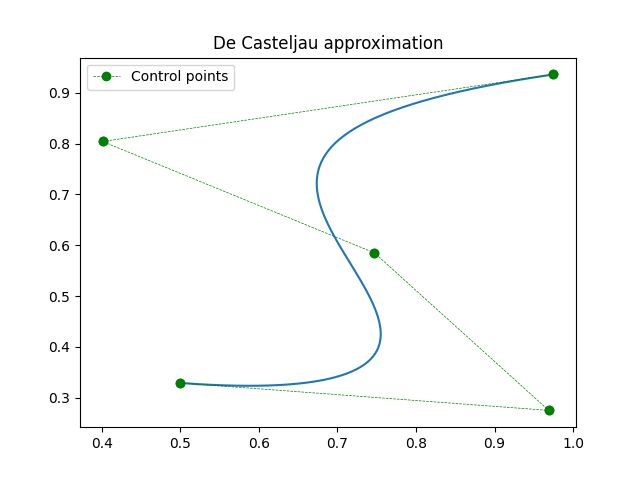

In [38]:
## Initial control points
nb_ctrl_pts = 5
x_ctrl_pts, y_ctrl_pts = generate_points(nb_ctrl_pts)
print(x_ctrl_pts)
print(y_ctrl_pts)

points_list = []
for tt in list_t:
    # Approximation of x-coordinates
    x = de_casteljau(x_ctrl_pts, tt)
    # Approximation of y-coordinates
    y = de_casteljau(y_ctrl_pts, tt)
    points_list.append([x, y])

plt.figure()
points = np.array(points_list)
plt.plot(points[:, 0], points[:, 1])
plt.plot(x_ctrl_pts, y_ctrl_pts, color='green', marker='o', linestyle='--', linewidth=0.5, label='Control points')
plt.scatter(x_ctrl_pts, y_ctrl_pts, color='green')
plt.legend()
plt.title('De Casteljau approximation')
plt.show()

# De Casteljau Subdivision

In this section, we reuse the de Casteljau algorithm but this time to implement the subdivision of a Bézier curve.

In [ ]:
## Initial control points

nb_ctrl_pts = 4
x_ctrl_pts, y_ctrl_pts = generate_points(nb_ctrl_pts)

slider = widgets.IntSlider(value=3, min=0, max=30, description='rank')

# Update function called when the slider value changes
def update_output(change):
    with out:
        clear_output()  # Clear the previous output
        plt.clf()
        for nb_subdivision in range(0, change.new + 1):
            X_subdivision, Y_subdivision = de_casteljau_subdivision(x_ctrl_pts, y_ctrl_pts, nb_subdivision)

            plt.plot(X_subdivision, Y_subdivision, color=liste_couleurs[nb_subdivision % 5],
                     marker='o', markersize=1, linestyle='--', linewidth=0.5, label=f'k = {nb_subdivision}')
        clear_output(wait=True)
        plt.scatter(x_ctrl_pts, y_ctrl_pts, color='red')
        plt.legend()
        plt.title('DeCasteljau Subdivision Approximation')
        plt.show()
        clear_output(wait=True)

# Link the update function with the slider
slider.observe(update_output, names='value')

# Create the output (optional)
out = widgets.Output()

# Display the slider and the output (if used)
display(slider, out)


IntSlider(value=3, description='rank', max=30)

Output()

# **Comparison of the three methods to compute a Bézier curve**

There are two ways to compare the models, either by varying the number of time samples or by varying the number of control points.

In this first example, we fix the number of time samples and vary the number of control points to observe the execution time of each method.


100%|██████████| 10/10 [00:00<00:00, 21.69it/s]

2.0
-1.0
-4.0
-8.0
-11.0
-14.0
-18.0
-21.0
-24.0
-28.0


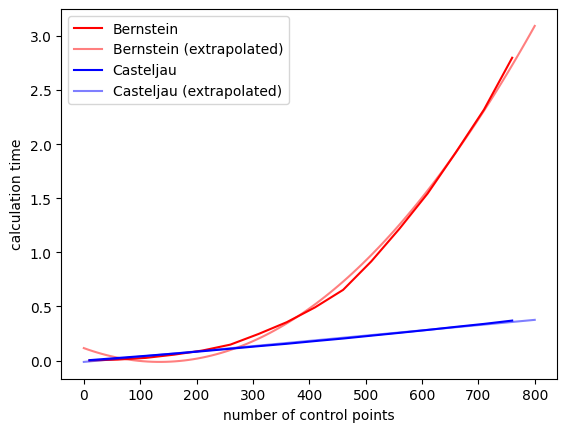

[0.45966506004333496, 0.00011706352233886719, 2.09808349609375e-05, 1.4066696166992188e-05, 1.2159347534179688e-05, 1.1920928955078125e-05, 1.0013580322265625e-05, 1.0967254638671875e-05, 1.0967254638671875e-05, 9.775161743164062e-06]


ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

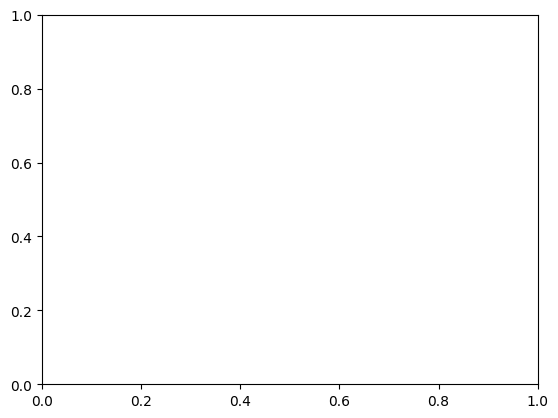

In [16]:
import time
initial_value = 10
final_value = 800
step_size = 50
nb_samples = 50



compare_temps_1(initial_value, final_value, step_size, nb_samples)

You should observe that the computation based on Bernstein algorithm explodes after a few hundred checkpoints. This is due to the calculation of Bernstein polynomials and especially factorials which greatly complicates the calculations.
We can see that the de Castejau subdivision is much more optimized for this kind of calculation.

It has a complexity $O(n^2)$ with $n$ the degree of the curve, but converges quickly ($0(1/2^i)$) after $i$ subdivisions.

The basic casteljau algorithm has a complexity $O(n^2)$.

The Bezier_Bernstein algorithm has a complexity in $O(n)$ if we consider that all the Bernstein polynomials are already known.
If they have to be calculated, the complexity changes to $ O(n^2)$.




100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


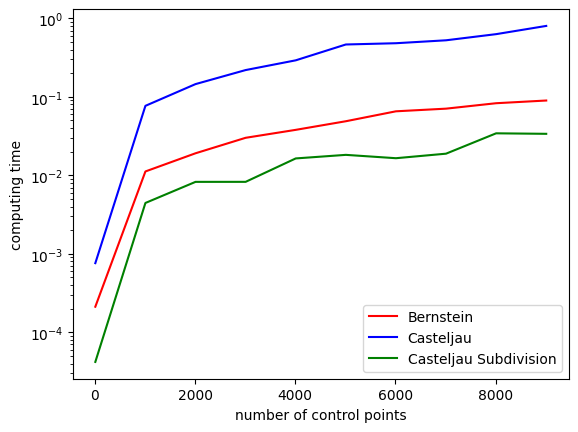

In [17]:
import time

initial_value = 10
final_value = 10000
step_size = 1000
nb_ctrl_pts = 100000




compare_temps_2(initial_value, final_value, step_size, 10)

# **Tensor product Bézier Surfaces** #

We can now use the casteljau subdivision algorithm for a tensor product surface. We first define the control points by taking them on a functionnal surface.

In [ ]:
from time import time
t1 = time()
# Generate a grid of regular control points
nb_samples = 50
list_t = generate_samples(nb_samples=nb_samples)

nb_point_grille = 50
X, Y = np.meshgrid(np.linspace(-10, 10, nb_point_grille), np.linspace(-10, 10, nb_point_grille))

Z = 6 * (np.exp(-((X**2 + Y**2 - 9)**2) / 100) + np.exp(-((X**2 + Y**2 - 49)**2) / 100))

fig2 = go.Figure(data=[go.Surface(
    x=X,
    y=Y,
    z=Z,
    showlegend=False,
    name="control point"
    )])

fig2.show()

cc = generate_samples(nb_samples=nb_samples)
# Interpolate the surface
approx_surface = approximation_surface(X, Y, Z, list_t, nb_point_grille)

print(approx_surface.shape)
# Visualization
afficher_surface(X, Y, Z, approx_surface, 'circular wave')
t2 = time()
print(t2 - t1)


We can also define sahpes in a parametric way, and for example, define a geometric object with a hole. For example, the torus:

In [ ]:
# Generate a grid of regular control points
from numpy import cos
from numpy import sin
nb_samples = 200
list_t = generate_samples(nb_samples= nb_samples)
nb_point_grille = 10
R = 3
r = 1.2
U, V = np.meshgrid(np.linspace(0, 2*np.pi, nb_point_grille), np.linspace(0, 2*np.pi, nb_point_grille))

X = (R + r*np.cos(V))*cos(U)
Y = (R + r*np.cos(V))*sin(U)
Z = r*np.sin(V)

# Parameterization
nb_echantillon_surface = 2
cc = generate_samples(nb_samples= nb_samples)
# Interpolate the surface
approx_surface = approximation_surface(X, Y, Z, list_t, nb_point_grille)

print(approx_surface.shape)
# Visualization
afficher_surface(X, Y, Z, approx_surface, 'torus')


Vary the number of samples and the number of checkpoints and observe the results. What do you notice when you vary the number of samples? The number of checkpoints?

# **Hodograph**

Compute the hodograph of a Bézier curve defined by its control points.

In [ ]:
## Initial control points
nb_ctrl_pts = 5

x_ctrl_pts, y_ctrl_pts = generate_points(nb_ctrl_pts)

# Calculate the convex hull
points = np.zeros((len(x_ctrl_pts), 2))
points[:, 0], points[:, 1] = x_ctrl_pts, y_ctrl_pts
hull = ConvexHull(points)

# Calculate the hodograph
hodograph(x_ctrl_pts, y_ctrl_pts, 200)


#### **Turning point requirement**

A necessary condition for a Bézier curve to have a cusp (point de rebroussement) is that its hodograph (i.e. the curve of its hodograph) passes through the origin (in this case the parameterization is irregular).


In [ ]:



x_ctrl_pts = [0, 1, 1, 0]
y_ctrl_pts = [0, 1, 0, 1]


hodograph(x_ctrl_pts, y_ctrl_pts, 200)